# 변수가 여러 개인 데이터 클러스터링

In [14]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

df= pd.read_csv('data/player.csv')
df

,선수,외식,영화관람,공연관람,쇼핑횟수
0,김연경,97,13,14,20
1,박태환,88,6,9,17
2,박지성,5,2,0,0
3,손흥민,135,9,15,11
4,차두리,18,0,3,10
5,황희찬,81,11,8,110
6,류현진,9,0,6,7
7,김민재,11,8,1,30
8,이윤열,0,8,1,0
9,김병현,19,9,3,2


In [15]:
#standard 스케일링
from sklearn.preprocessing import StandardScaler

df_scaled = StandardScaler().fit_transform(df.drop(['선수'],axis=1))
df_scaled

array([[ 1.16449073,  1.4888528 ,  1.66804677,  0.        ],
       [ 0.96080773, -0.19705405,  0.67084489, -0.10085944],
       [-0.91760224, -1.16042938, -1.12411847, -0.67239626],
       [ 2.02448566,  0.52547746,  1.86748714, -0.30257832],
       [-0.62339345, -1.64211705, -0.52579735, -0.33619813],
       [ 0.80238761,  1.00716513,  0.47140452,  3.02578316],
       [-0.82707646, -1.64211705,  0.07252377, -0.43705757],
       [-0.78181357,  0.28463362, -0.9246781 ,  0.33619813],
       [-1.03075947,  0.28463362, -0.9246781 , -0.67239626],
       [-0.600762  ,  0.52547746, -0.52579735, -0.60515663],
       [-0.17076454,  0.52547746, -0.72523772, -0.23533869]])

C:\Users\jylpi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jylpi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jylpi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jylpi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

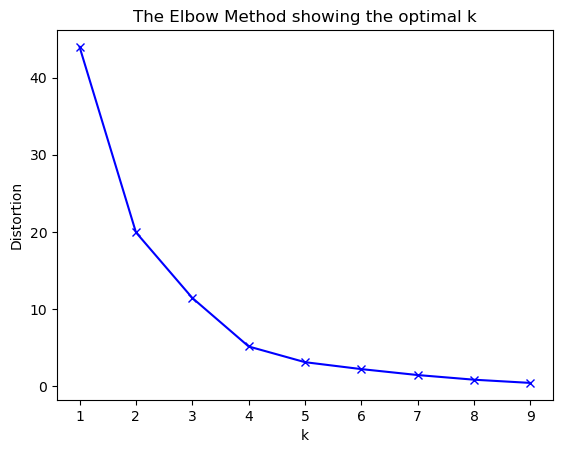

In [16]:
#오차제곱합으로 최적 클러스터 갯수 찾기
X = df_scaled

inertia_arr = [] #SSE값을 저장하기 위한 list
K = range(1,10)

for k in K :
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(X) #모델적합
    inertia = kmeanModel.inertia_
    inertia_arr.append(inertia)
    
#Plot the elbow
plt.plot(K,inertia_arr, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [17]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X) ##클러스터 설정, 3개로 세팅

C:\Users\jylpi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jylpi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [18]:
kmeans.labels_

array([2, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0])

In [19]:
#원데이터에 클러스터링 결과 추가
df['cluster_id'] = kmeans.labels_
df

,선수,외식,영화관람,공연관람,쇼핑횟수,cluster_id
0,김연경,97,13,14,20,2
1,박태환,88,6,9,17,2
2,박지성,5,2,0,0,0
3,손흥민,135,9,15,11,2
4,차두리,18,0,3,10,0
5,황희찬,81,11,8,110,1
6,류현진,9,0,6,7,0
7,김민재,11,8,1,30,0
8,이윤열,0,8,1,0,0
9,김병현,19,9,3,2,0


In [20]:
#cluster id 오름차순 정렬
df = df.sort_values(by='cluster_id')
df

,선수,외식,영화관람,공연관람,쇼핑횟수,cluster_id
2,박지성,5,2,0,0,0
4,차두리,18,0,3,10,0
6,류현진,9,0,6,7,0
7,김민재,11,8,1,30,0
8,이윤열,0,8,1,0,0
9,김병현,19,9,3,2,0
10,기성용,38,9,2,13,0
5,황희찬,81,11,8,110,1
0,김연경,97,13,14,20,2
1,박태환,88,6,9,17,2


In [21]:
df_scaled

array([[ 1.16449073,  1.4888528 ,  1.66804677,  0.        ],
       [ 0.96080773, -0.19705405,  0.67084489, -0.10085944],
       [-0.91760224, -1.16042938, -1.12411847, -0.67239626],
       [ 2.02448566,  0.52547746,  1.86748714, -0.30257832],
       [-0.62339345, -1.64211705, -0.52579735, -0.33619813],
       [ 0.80238761,  1.00716513,  0.47140452,  3.02578316],
       [-0.82707646, -1.64211705,  0.07252377, -0.43705757],
       [-0.78181357,  0.28463362, -0.9246781 ,  0.33619813],
       [-1.03075947,  0.28463362, -0.9246781 , -0.67239626],
       [-0.600762  ,  0.52547746, -0.52579735, -0.60515663],
       [-0.17076454,  0.52547746, -0.72523772, -0.23533869]])

In [23]:
#축소 전 클러스터링하기!
from sklearn.decomposition import PCA

pca = PCA(n_components = 2) #차원개수선정 그래프상에 나타내기 위해 2차원
pca.fit(df_scaled)
df_pca = pca.transform(df_scaled)

print("축소전: ", df_scaled.shape)
print("축소후: ", df_pca.shape)

축소전:  (11, 4)
축소후:  (11, 2)


In [24]:
cols= ["pc1","pc2"]
df_pca = pd.DataFrame(data=df_pca, columns = cols)
df_pca

,pc1,pc2
0,2.314141,-0.613580
1,0.815862,-0.719006
2,-1.945058,-0.126476
3,2.379964,-1.492849
4,-1.546931,-0.363410
5,2.258617,2.255173
6,-1.370687,-0.648504
7,-0.727911,0.991979
8,-1.225488,0.270232
9,-0.612689,0.096178


In [25]:
#선수칼럼과 클러스터번호칼럼 추가
df_pca["name"] = df.선수
df_pca["target"] = df.cluster_id

df_pca

,pc1,pc2,name,target
0,2.314141,-0.613580,김연경,2
1,0.815862,-0.719006,박태환,2
2,-1.945058,-0.126476,박지성,0
3,2.379964,-1.492849,손흥민,2
4,-1.546931,-0.363410,차두리,0
5,2.258617,2.255173,황희찬,1
6,-1.370687,-0.648504,류현진,0
7,-0.727911,0.991979,김민재,0
8,-1.225488,0.270232,이윤열,0
9,-0.612689,0.096178,김병현,0


# 시각화
* 선수데이터 차원 축소 시각화

Text(0, 0.5, 'pc2')

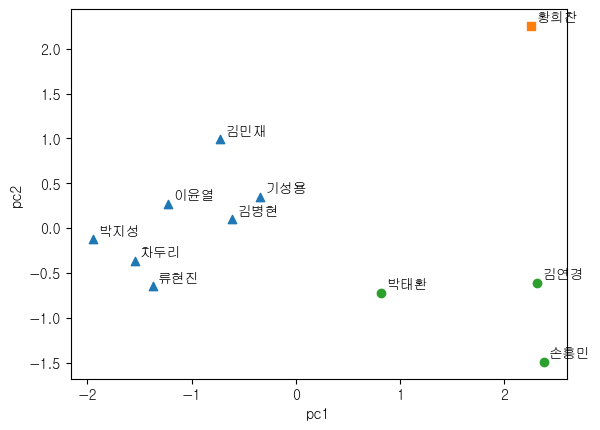

In [31]:
#3 종류의 마커로 그래프 상 좌표표시
markers = ["^", "s", "o"]
for i, marker in enumerate(markers):
    x_val = df_pca[df_pca["target"]==i]["pc1"]
    y_val = df_pca[df_pca["target"]==i]["pc2"]
    plt.scatter(x_val, y_val, marker = marker)
    
#한글폰트 가져오기
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/gulim.ttc"
font =font_manager.FontProperties(fname = font_path).get_name()
rc('font', family=font)

#선수 이름 표시
for i in range(11):
    plt.text(df_pca['pc1'][i]+0.05, df_pca['pc2'][i]+0.05, df_pca['name'][i])
    
plt.xlabel("pc1")
plt.ylabel("pc2")